In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import matplotlib.colors as colors
import copy
import math
import sys
sys.setrecursionlimit(2000)

In [5]:
# Define the font family and size
font = {'family' : 'serif', 'size' : 20 }
mpl.rc('font', **font)
mpl.rcParams['mathtext.fontset'] = 'cm' # Set the math font to Computer Modern
mpl.rcParams['legend.fontsize'] = 1

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


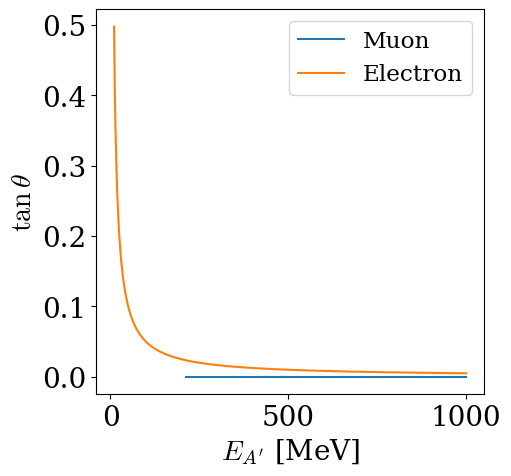

In [6]:
c = 3e8
m_A = 10/c**2 # MwC/c^2
m_e = .511/c**2 # MeV/c^2
m_mu = 105.7/c**2 # MeV/c^2

E_A_e_lim = m_A*c**2
if 2*m_e*c**2 < m_A*c**2: E_A_e_lim = m_A*c**2
else:                     E_A_e_lim = 2*m_e*c**2

E_A_mu_lim = m_A*c**2
if 2*m_mu*c**2 < m_A*c**2: E_A_mu_lim = m_A*c**2
else:                      E_A_mu_lim = 2*m_mu*c**2

nPoints = 1000
E_max = 1*1000 # MeV
E_A_e  = np.linspace(E_A_e_lim ,E_max,nPoints) # MeV
E_A_mu = np.linspace(E_A_mu_lim,E_max,nPoints) # MeV

theta_e  = [ ( m_A**2*c**2/4 - m_e **2*c**2 )**(1/2) / ( E**2/c**2 - m_A**2 )**(1/2) for E in E_A_e  ]
theta_mu = [ ( m_A**2*c**2/4 - m_mu**2*c**2 )**(1/2) / ( E**2/c**2 - m_A**2 )**(1/2) for E in E_A_mu ]

# Create a 5x5 figure
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the lines
ax.plot(E_A_mu, theta_mu, label='Muon')
ax.plot(E_A_e , theta_e , label='Electron')

# Set labels and title
ax.set_xlabel(r"$E_{A'}$ [MeV]")
ax.set_ylabel(r'$\tan\theta$')
ax.set_title('')

# Set legend
ax.legend(fontsize='small')

# Display the plot
plt.show()


In [18]:
c = 3e8
m_e = .511/c**2 # MeV/c^2
m_mu = 105.7/c**2 # MeV/c^2
m_l=m_e

m_A_min = 0/c**2 # MeV
m_A_max = 1*1000/c**2 # MeV
E_A_max = 1*300 # MeV
nPoints = 500

points = []
for E in np.linspace(m_A_min*c**2, E_max, nPoints):
    for m in np.linspace(m_A_min, m_A_max, nPoints):
        # numerator   = m**2*c**2/4 - m_l**2*c**2
        numerator   = m**2*c**2/2 - 2*m_l**2*c**2
        denominator = E**2/c**2 - m**2*c**2
        # print(E,m)
        if numerator < 0 or denominator < 0: theta = 0
        else:                                theta = numerator**(1/2)/denominator**(1/2)
        # print(theta)
        points.append((E,m,math.tan(theta)))

fig_1, ax_1 = plt.subplots(figsize=(5, 5))
cmap = plt.cm.jet
cmap.set_under('white')  # Set zero-valued bins to white
hist = ax_1.hist2d(
    [E for E,m,theta in points],
    [m*c**2 for E,m,theta in points],
    bins=nPoints,
    # cmap='rainbow',
    cmap=plt.cm.jet,
    weights=[theta for E,m,theta in points],
    norm=colors.LogNorm(vmin=0.001),  # Set vmin directly in LogNorm
    # vmin=0.001
)
ax_1.set_xlabel(r"$E_{A'}$ [MeV]")
ax_1.set_ylabel(r"$m_{A'}$ [MeV/c$^2$]")
# ax.set_xlim([0, 6])
# ax.set_ylim([0,math.pi/math.pi*180])
cbar = plt.colorbar(hist[3], ax=ax_1)
cbar.set_label(r'$\theta_{max}$')
# fig.text(0.51, 0.90, r"ANNIE Preliminary Simulation", ha='center', va='center', rotation='horizontal',alpha=.6,size=14)
plt.savefig('A->ll Angle.pdf',bbox_inches='tight')

# Display the plot
plt.show()


/tmp/ipykernel_53846/418196395.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  else:                                theta = numerator**(1/2)/denominator**(1/2)


ValueError: math domain error

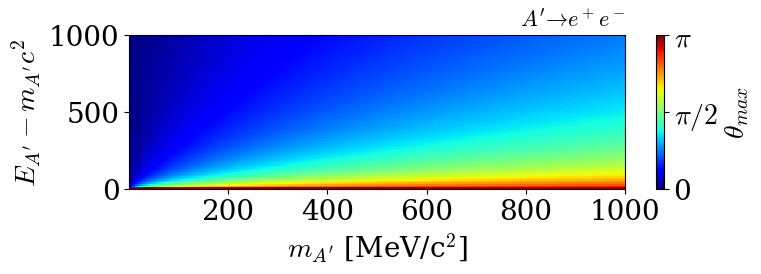

In [23]:
c = 3e8
m_e = .511/c**2 # MeV/c^2
m_mu = 105.7/c**2 # MeV/c^2
m_l=m_e

m_A_min = m_l*c**2*2/c**2 # MeV
m_A_max = 1*1000/c**2 # MeV
deltaE_min = 1e-12 # MeV
deltaE_max =  1000 # MeV
nPoints_x = 600
nPoints_y = 100

points = []
for m in np.linspace(m_A_min, m_A_max, nPoints_x):
    for deltaE in np.linspace(deltaE_min, deltaE_max, nPoints_y):
        E = deltaE + m*c**2
        numerator   = m**2*c**2/2 - 2*m_l**2*c**2
        denominator = E**2/c**2 - m**2*c**2
        if numerator < 0 or denominator < 0: theta = 0
        else:                                theta = numerator**(1/2)/denominator**(1/2)
        theta = math.atan(theta)
        points.append((m,deltaE,theta))

fig_2, ax_2 = plt.subplots(figsize=(8, 2))
cmap = plt.cm.jet
cmap.set_under('white')  # Set zero-valued bins to white
hist = ax_2.hist2d(
    [m*c**2 for m,deltaE,theta in points],
    [deltaE for m,deltaE,theta in points],
    bins=[nPoints_x, nPoints_y],
    # cmap='rainbow',
    cmap=plt.cm.jet,
    weights=[2*theta for m,deltaE,theta in points],
    # norm=colors.LogNorm(vmin=0.001),  # Set vmin directly in LogNorm
    vmin=0.001
)
ax_2.set_xlabel(r"$m_{A'}$ [MeV/c$^2$]")
ax_2.set_ylabel(r"$E_{A'}-m_{A'}c^2$")
# ax.set_xlim([0, 6])
# ax.set_ylim([0,math.pi/math.pi*180])
cbar = plt.colorbar(hist[3], ax=ax_2)
cbar.set_label(r'$\theta_{max}$')
cbar.set_ticks([0, math.pi/2, math.pi])
cbar.set_ticklabels(['0', r'$\pi/2$', r'$\pi$'])

# ax_2.set_title("Preliminary", loc='right', fontsize=13, color='dimgray')
title = ""
if m_l == m_mu:
    ax_2.set_title(r"$A'\to\mu^+\mu^-$", loc='right', fontsize=16)
    title = "A --> mumu Angle - deltaE.pdf"
elif m_l == m_e:
    ax_2.set_title(r"$A'\to e^+e^-$", loc='right', fontsize=16)
    title = "A --> ee Angle - deltaE.pdf"

# fig.text(0.51, 0.90, r"ANNIE Preliminary Simulation", ha='center', va='center', rotation='horizontal',alpha=.6,size=14)
plt.savefig(title,bbox_inches='tight')

# Display the plot
plt.show()